In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from config_store import targetDataSet
from utility_functions import dataSetSplit, doKFold, score

In [41]:
# Import and preview data set
data = pd.read_csv(targetDataSet)
data.head()

,Website,Length,Protocol,Info
0,0,66,1,4
1,0,66,1,1
2,0,54,1,6
3,0,712,0,12
4,0,1490,0,8


In [42]:
# Separate data set using test/train split
XTrain, XTest, yTrain, yTest = dataSetSplit(data.drop(columns = ["Website"]).values, data["Website"].values)

In [43]:
# Perform k-fold to optimize max_iter hyperparameter
iterRange = np.array(range(100, 1000, 100))

# Hold k-fold result for each possible iter value
train = []
test = []

# Perform k-fold for each possible hyperparameter value
for iter in iterRange:
    knn = LR(max_iter = iter)
    trainResult, testResult = doKFold(knn, XTrain, yTrain)
    
    train.append(np.mean(trainResult))
    test.append(np.mean(testResult))

c:\Users\okisn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\okisn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

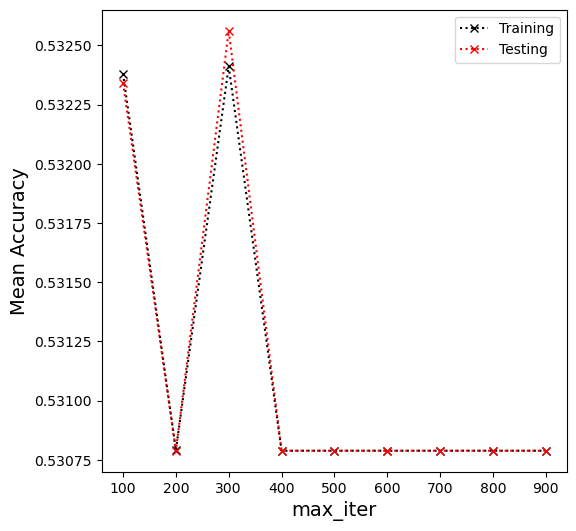

In [44]:
plt.figure(figsize = (6, 6))
plt.plot(iterRange, train, ":xk", label = "Training")
plt.plot(iterRange, test, ":xr", label = "Testing")
plt.ylabel("Mean Accuracy", fontsize = 14)
plt.xlabel("max_iter",fontsize = 14)
plt.xticks(iterRange)
plt.legend()
plt.show()

In [45]:
# Get optimal hyperparameter for KNN
maxIndex = (test == np.max(test))
print(iterRange[maxIndex])
print(np.max(test))
print(np.max(train))

[300]
0.5325615763546799
0.5324110563765736


In [46]:
# Final logistic regression model
lr = LR(max_iter = iterRange[maxIndex][0])
lr.fit(XTrain, yTrain)

c:\Users\okisn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [47]:
# Score model
score(lr, XTrain, yTrain, XTest, yTest)

Training score: 0.5307881773399015
Testing score: 0.533937543099202
